# Logistic Regression Project -

In this project we will be working with simulated advertising data set, indicating whether or not a particular internet user will click on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



## 1.Import Libraries

**Importing required python dependencies-**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Reading CSV dataset in pandas -**

In [2]:
filepath = '/content/advertising.csv'
df = pd.read_csv(filepath)

**Check the head of ad_data-**

In [3]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Further exploring the dataset-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 2. Exploratory Data Analysis -

Performing EDA to understand Data distributions -

### **2.1 Creating a histogram of the Age**

In [6]:
sns.set_style('whitegrid')

In [9]:
np.mean(df['Age'])

36.009

<Axes: xlabel='Age', ylabel='Count'>

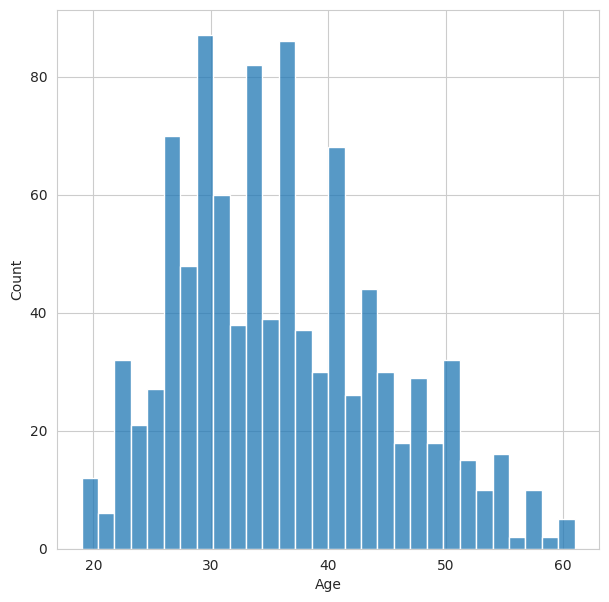

In [8]:
plt.figure(figsize = (7,7))
sns.histplot(data = df, x='Age',bins = 30)

**Insight gained** - Highest peak distribution is noticed in the age group 28 - 35 Yrs, with mean of 36 Yrs.

### **2.2 Creating a jointplot showing Area Income versus Age.**

In [10]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

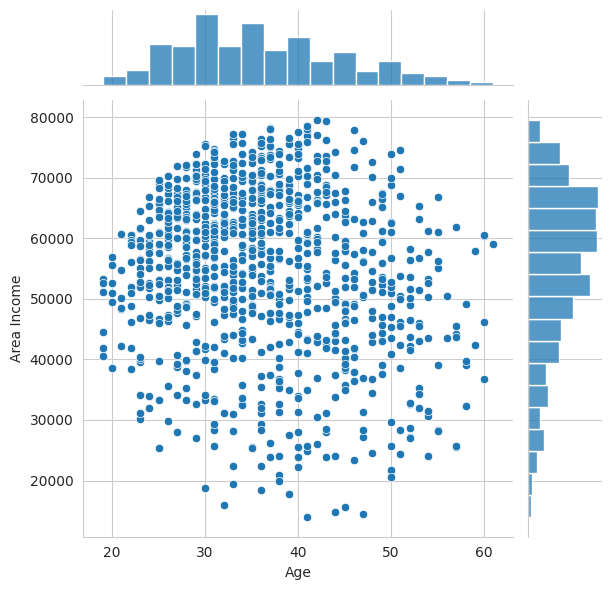

In [11]:
sns.jointplot(data = df,y='Area Income',x='Age')

**Insight gained** - Highest Area income above 50000 USD is in the age group of 20 to 40 years.

### **2.3 Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

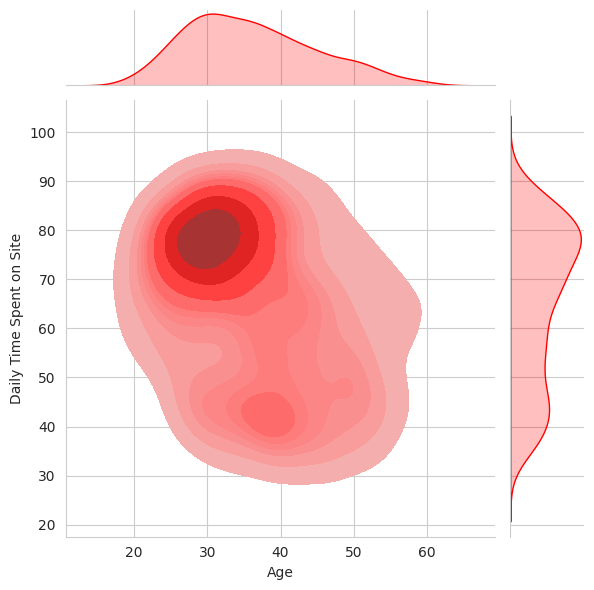

In [12]:
sns.jointplot(data = df,y='Daily Time Spent on Site',x='Age',kind = 'kde',color = 'Red',fill = True)

### **2.4 Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

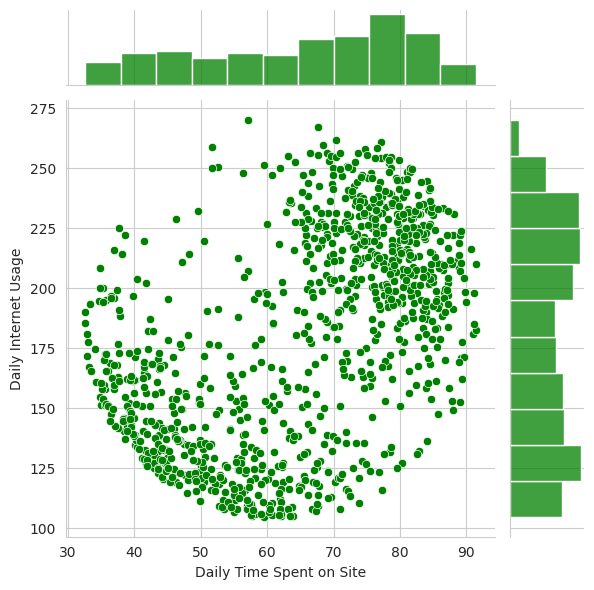

In [13]:
sns.jointplot(data = df,x='Daily Time Spent on Site',y= 'Daily Internet Usage',color = 'Green')

### **2.5 Creating a pairplot with the hue defined by 'Clicked on Ad' column feature.**

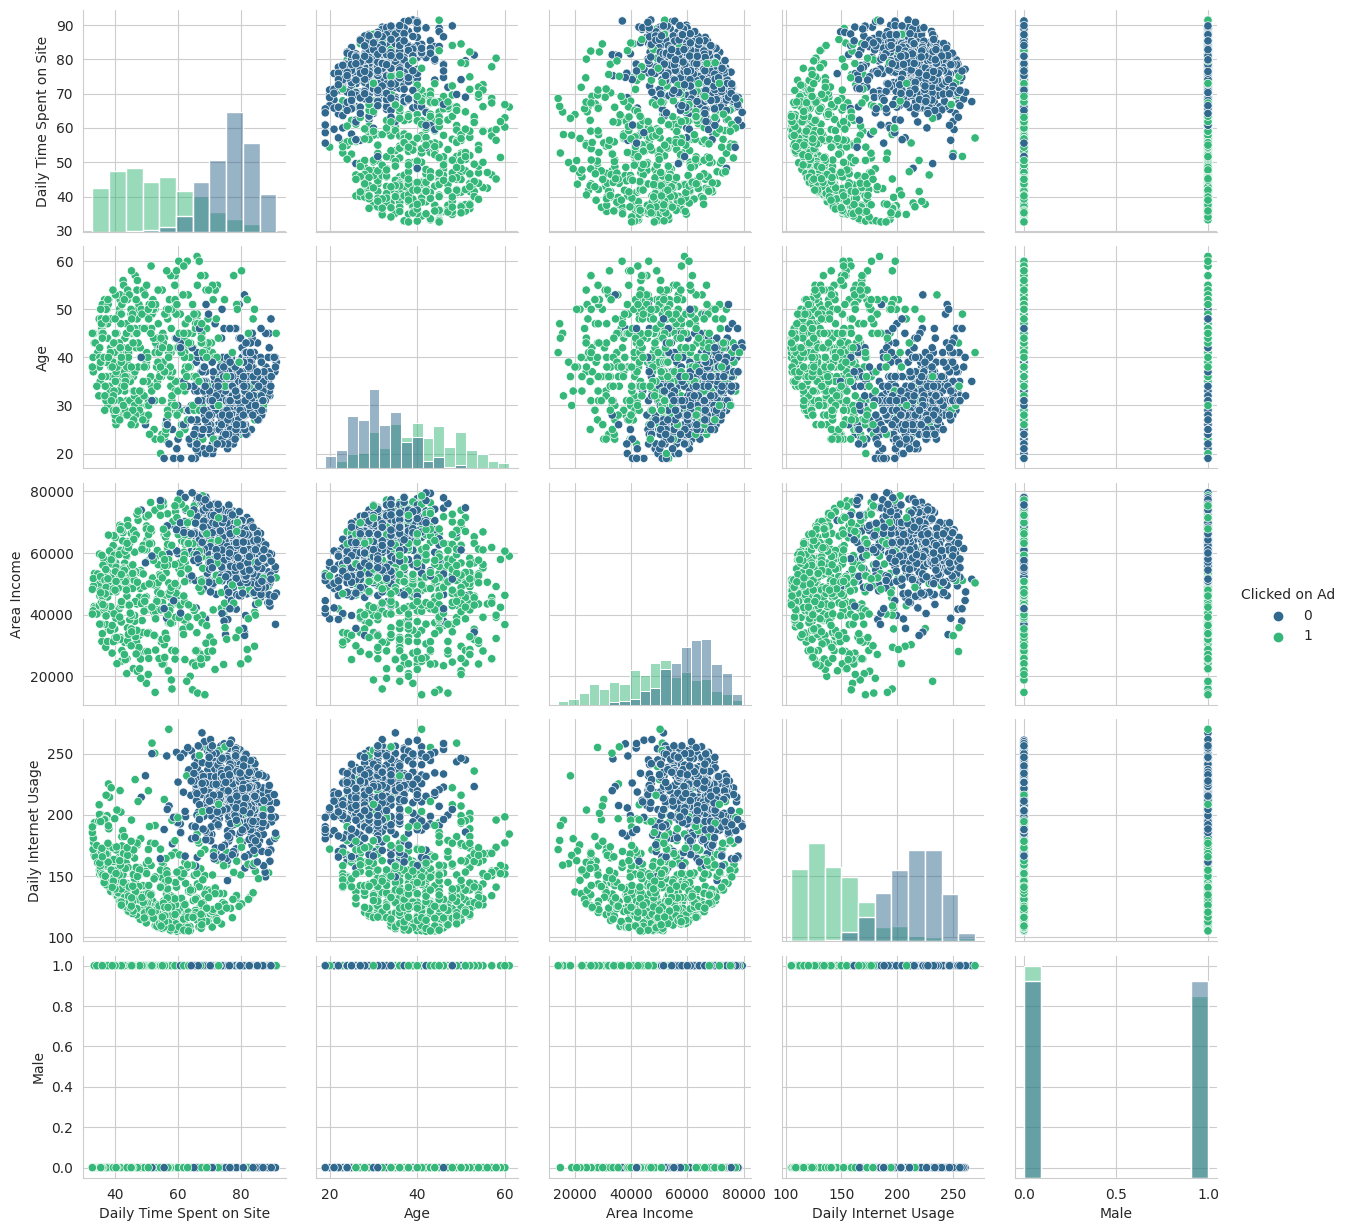

In [14]:
sns.pairplot(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Clicked on Ad']],hue = 'Clicked on Ad',diag_kind='hist',palette = 'viridis')

### **3. Utilising Logistic Regression to Train the model -**

In [15]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

**Utilising Scikit-learn packages to fit logistic regression model-**

### **3.1 Splitting the dataset into training and testing data-**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()

In [20]:
logmodel.fit(X_train,y_train)

LogisticRegression()

**Obtaining prediction values for X_test data -**

In [21]:
prediction = logmodel.predict(X_test)

### **3.2 Creating a classification report for the model using scikit-learn metrics-**

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

